### Data collection ###

In [5]:
import arxiv
import pandas as pd
from tqdm import tqdm

In [18]:
keywords = [f'\"{word}\"' for word in """
science
technology
biology
computer science
medicine
machine learning
equation
deep learning
distribution
learning
generation
model
image
graph
estimation
tree
molecule
quantum
genetic
computing
dna
engineering
data
study
advanced
astronomy
astrophysics
atom
beaker
biochemistry
chemistry
botany
cell
chemical
climate
control
electricity
element
energy
evolution
fossil
geology
geophysics
gravity
hypothesis
immunology
magnet
matter
meteorology
motion
organism
observe
phase
particle
physics
quantum mechanics
research
radiology
temperature
theory
tissue
variable
variational
volume
weather
zoology
""".split('\n')][1:-1]

In [25]:
client = arxiv.Client(num_retries=20, page_size=500)

def query_with_keywords(query):
    search = arxiv.Search(
    query=query,
    max_results=30000
    )
    
    published = []
    titles = []
    abstracts = []
    journals = []
    dois = []
    
    already_found = set()
    
    for res in tqdm(client.results(search), desc=query):
        authors = ' '.join([a.name for a in res.authors])
        if (res.published.year >= 2013 and
            res.published.year <= 2019 and
            res.journal_ref is not None and
            (res.title, authors) not in already_found):
                already_found.add((res.title, authors))
                published.append(res.published)
                titles.append(res.title)
                abstracts.append(res.summary)
                journals.append(res.journal_ref)
                dois.append(res.doi)

    return published, titles, abstracts, journals, dois


In [26]:
all_published = []
all_titles = []
all_abstracts = []
all_journals = []
all_dois = []

for query in keywords:
    published, titles, abstracts, journals, dois = query_with_keywords(query)
    all_published.extend(published)
    all_titles.extend(titles)
    all_abstracts.extend(abstracts)
    all_journals.extend(journals)
    all_dois.extend(dois)

"science": 30000it [08:13, 60.81it/s]
"technology": 30000it [08:41, 57.50it/s]
"biology": 9819it [02:39, 61.70it/s]
"computer science": 30000it [09:10, 54.51it/s]
"medicine": 3579it [00:58, 61.59it/s]
"machine learning": 30000it [09:55, 50.37it/s]
"equation": 30000it [08:17, 60.25it/s]
"deep learning": 30000it [09:25, 53.04it/s]
"distribution": 30000it [08:50, 56.50it/s]
"learning": 30000it [08:36, 58.08it/s]
"generation": 30000it [09:55, 50.34it/s]
"model": 30000it [11:13, 44.54it/s]
"image": 30000it [08:49, 56.67it/s]
"graph": 30000it [09:16, 53.94it/s]
"estimation": 30000it [09:57, 50.22it/s]
"tree": 30000it [09:02, 55.28it/s]
"molecule": 28685it [08:27, 56.51it/s]
"quantum": 30000it [08:55, 56.00it/s]
"genetic": 8139it [02:09, 62.97it/s]
"computing": 30000it [10:22, 48.21it/s]
"dna": 5122it [01:20, 63.27it/s]
"engineering": 30000it [09:12, 54.32it/s]
"data": 30000it [10:12, 49.00it/s]
"study": 30000it [09:27, 52.83it/s]
"advanced": 30000it [08:39, 57.71it/s]
"astronomy": 30000it [0

187538


In [179]:
data = pd.DataFrame({
    'title': all_titles,
    'published': all_published,
    'abstract': all_abstracts,
    'journal': all_journals,
    'doi': all_dois
})

data.to_csv('../dataset/arxiv_data_top_30000.csv', index=False)

In [25]:
data = pd.read_csv('../dataset/arxiv_data_top_30000.csv')

In [26]:
data.head()

,title,published,abstract,journal,doi
0,Report on a Boston University Conference Decem...,2015-03-03 23:35:54+00:00,This is an editorial report on the outcomes of...,"Science & Education, September 2014, 23(9): 18...",10.1007/s11191-014-9716-8
1,The Science of al-Biruni,2013-12-22 07:55:13+00:00,Al-Biruni (973-1048) was one of the greatest s...,"International Journal of Sciences 2(12), 52-60...",10.18483/ijSci.364
2,Embracing Data Science,2016-07-04 12:40:15+00:00,Statistics is running the risk of appearing ir...,The UMAP Journal 36 (2015) 285-292,NaN
3,A New Task for the Philosophy of Science,2019-12-09 22:03:37+00:00,This paper argues that philosophers of science...,"Metaphilosophy Vol. 50, No. 3, April 2019, pp....",NaN
4,Science and Philosophy: A Love-Hate Relationship,2013-07-04 09:02:00+00:00,In this paper I review the problematic relatio...,"Foundations of Science, 25, 2000, pp. 297-314",10.1007/s10699-019-09619-2


In [6]:
data_prefiltered = data[['title', 'abstract']]
data_prefiltered.head()

,title,abstract
0,Report on a Boston University Conference Decem...,This is an editorial report on the outcomes of...
1,The Science of al-Biruni,Al-Biruni (973-1048) was one of the greatest s...
2,Embracing Data Science,Statistics is running the risk of appearing ir...
3,A New Task for the Philosophy of Science,This paper argues that philosophers of science...
4,Science and Philosophy: A Love-Hate Relationship,In this paper I review the problematic relatio...


In [4]:
data_prefiltered.to_csv('../dataset/data.csv')
#data_prefiltered = pd.read_csv('../dataset/data.csv')

In [5]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [8]:
# lowercase, remove punctuation
def filter_text(row):
    row = row.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    res = tokenizer.tokenize(row)
    return " ".join(res)

data_filtered = data_filtered.copy()
data_filtered['title'] = data_prefiltered.apply(lambda row: filter_text(row['title']), axis=1)
data_filtered['abstract'] = data_prefiltered.apply(lambda row: filter_text(row['abstract']), axis=1)

In [9]:
data_filtered.head()

,Unnamed: 0,title,abstract
0,0,report on a boston university conference decem...,this is an editorial report on the outcomes of...
1,1,the science of al biruni,al biruni 973 1048 was one of the greatest sci...
2,2,embracing data science,statistics is running the risk of appearing ir...
3,3,a new task for the philosophy of science,this paper argues that philosophers of science...
4,4,science and philosophy a love hate relationship,in this paper i review the problematic relatio...


In [10]:
data_filtered.to_csv('../dataset/data_filtered.csv')

In [29]:
from ArxivDataset import ArxivDataset
dataset = ArxivDataset()
dataset.from_file('../dataset/data_filtered.csv')

In [39]:
title_lens = []
abstract_lens = []
max_title_len = 0
max_abstract_len = 0
for title, abstract in dataset.instances:
    len_title = len(title)
    len_abstract = len(abstract)
    title_lens.append(len_title)
    abstract_lens.append(len_abstract)
    if len_title > max_title_len:
        max_title_len = len_title
    if len_abstract > max_abstract_len:
        max_abstract_len = len_abstract

In [56]:
import matplotlib.pyplot as plt
import numpy as np

Max title len: 47
Max abstract len: 619


[]

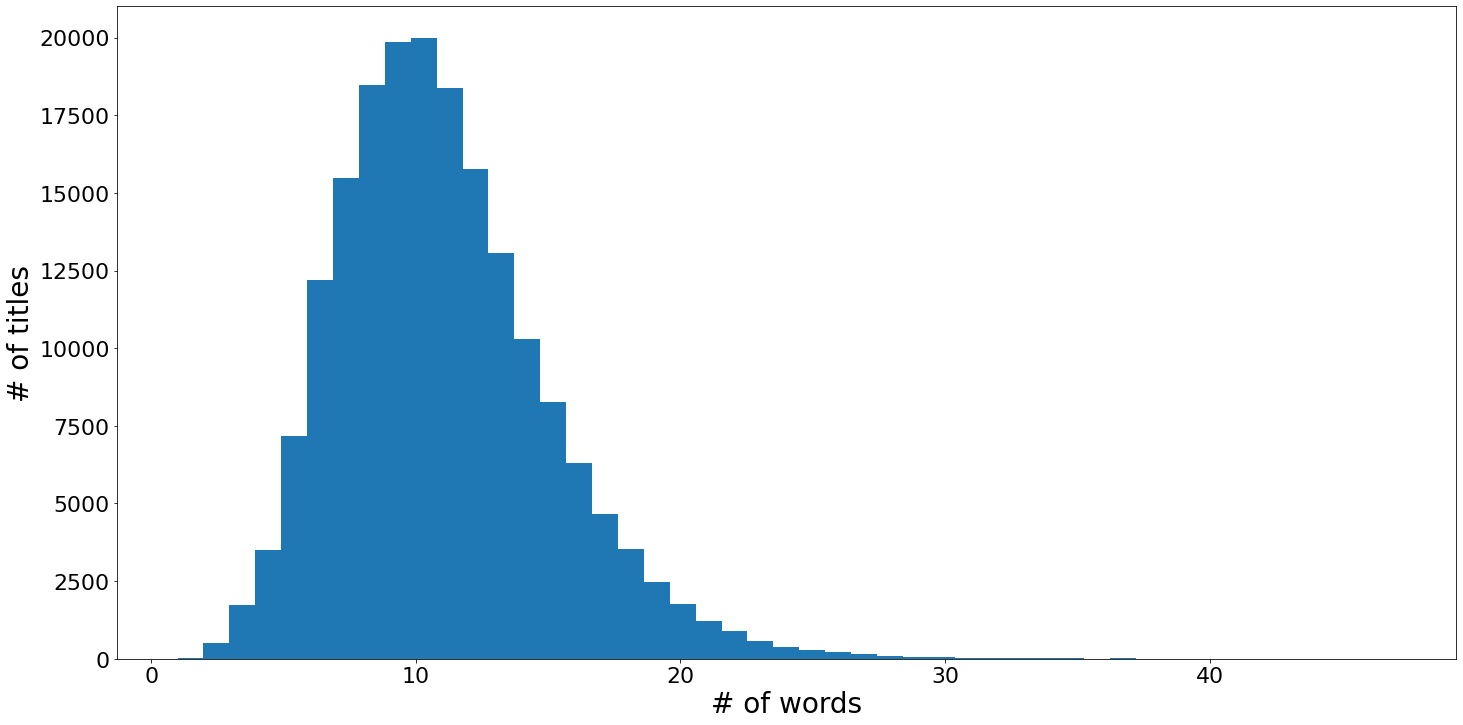

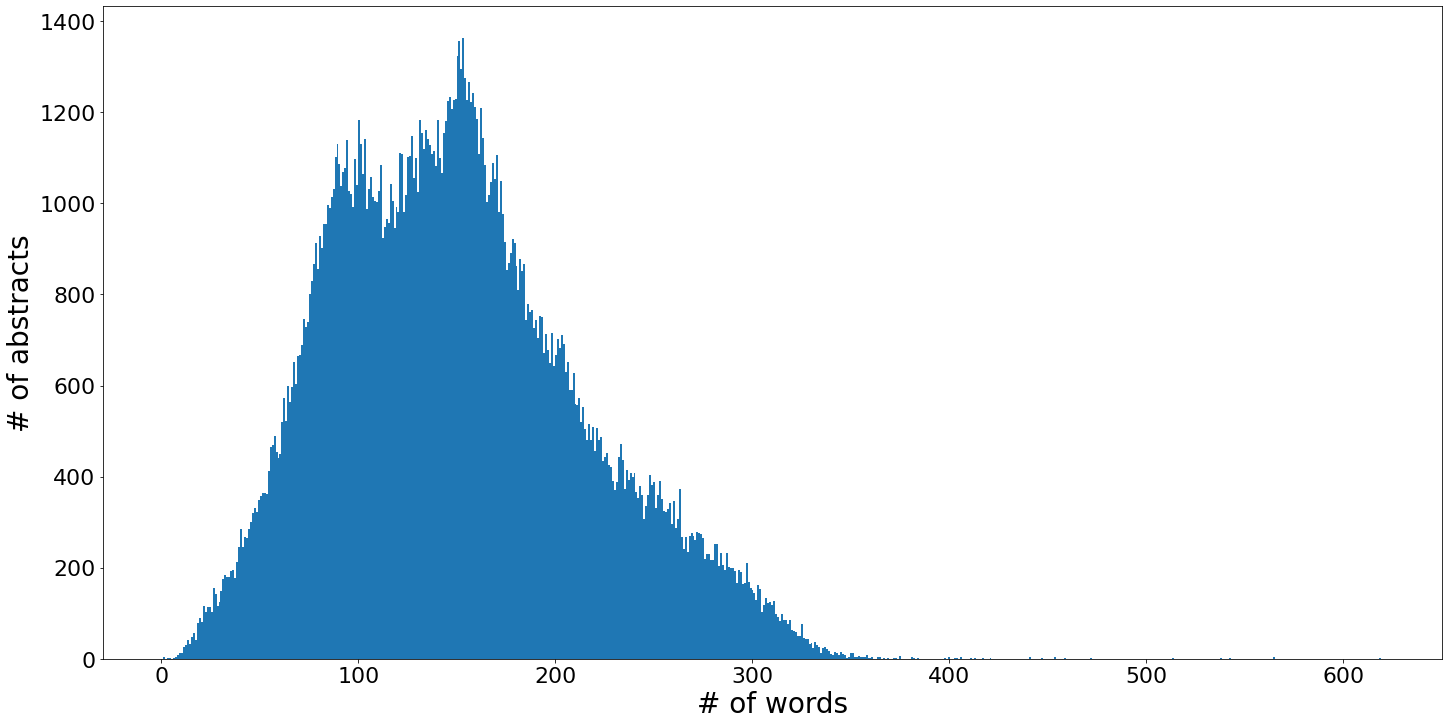

In [55]:
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(24, 12))
plt.hist(title_lens, bins=max_title_len)
plt.ylabel('# of titles', fontsize=28)
plt.xlabel('# of words', fontsize=28)
plt.plot()

plt.figure(figsize=(24, 12))
plt.ylabel('# of abstracts', fontsize=28)
plt.xlabel('# of words', fontsize=28)
plt.hist(abstract_lens, bins=max_abstract_len)
plt.plot()

In [64]:
title_lens = np.array(title_lens)
abstract_lens = np.array(abstract_lens)

print(f'Min title len: {np.min(title_lens)}')
print(f'Max title len: {np.max(title_lens)}')
print(f'Mean title len: {np.mean(title_lens)}')
print(f'Stddev title len: {np.sqrt(np.var(title_lens))}')
print(f'Median title len: {np.median(title_lens)}')

print()

print(f'Min abstract len: {np.min(abstract_lens)}')
print(f'Max abstract len: {np.max(abstract_lens)}')
print(f'Mean abstract len: {np.mean(abstract_lens)}')
print(f'Stddev abstract len: {np.sqrt(np.var(abstract_lens))}')
print(f'Median abstract len: {np.median(abstract_lens)}')

Min title len: 1
Max title len: 47
Mean title len: 10.74488370356941
Stddev title len: 4.100086118821517
Median title len: 10.0

Min abstract len: 1
Max abstract len: 619
Mean abstract len: 150.26933208203138
Stddev abstract len: 64.23186043180522
Median abstract len: 145.0
